# COGS 108 - Final Project

# Permissions
[x]No - keep private

# Names

- Manit Soni
- Young Jun Kim
- Esau Estrada
- Cooper Beaman
- Arren De Manuel

# Group Members IDs

- A15576567
- A16062404
- A16056905
- A13589935
- A15697684

# Overview

Our project explores how different sources of news media portrayed the candidates of the 2016 presidential election; namely Hillary Clinton and Donald Trump.  We look at articles from three news outlets:  CNN (moderate leaning), New York Times (left leaning), and Breitbart (right leaning). Using web scraping to gather our data followed by sentiment analysis to quantify candidate portrayals, we present a preliminary analysis of potential trends in sentiment between outlets and candidates.

# Research Question

What do one to two word phrases tell us about how different news outlets covered Donald Trump and Hillary Clinton in the 2016 general elections? Did news outlets predominately describe each candidate positively or negatively?

## Background and Prior Work

There has been much discussion over the words politicians use to convey their ideas. Their words are meant to convince the public and thus are catered for that effect. Many analyses have been done on the keywords politicians use and their connotations to the subjects they discuss. Our objective is to apply this same methodology to the words news organizations themselves use to describe political figures, focusing on the presidential candidates of the 2016 election.

We are interested in this questions as we often hear about fake news and media narratives and want to confirm the validity or falsity of this statement. The importance of this topic is in understanding the information we consume, especially as it is often taken for granted to be accurate.

There has already been research done to look at the headlines used during President Trump's term in office. Towards Data Science concluded that 'trump' was the most used word by quite a landslide. CNN and MSNBC used many keyword associated with trump's scandals, whereas FOX used more generic words such as 'man' and 'woman' [3]. The New Yorker analyzed the language used by the political condidates during the 2016 election [2]. For example, the Democratic candidates tended to use more concrete language and the Republican candidates tended to use more descriptive language.

# Hypothesis


### Explanation
Not all news outlets use words of equally negative sentiment in their articles, however all news outlet articles and headlines analyzed by Michael Tauberg at Towards Data Science exhibited a negative sentiment bias on average [3].  Additionally, during presidential elections in general, candidates typically search for negative events from their opponent's past to reduce their chances of winning. Furthermore, most humans tend to prefer gossip compared to other forms of conversation [4]. Hence, news outlets are incentivized to report negative stories, true or not from candidate's campaigns instead of more positive stories to increase viewership and revenue more reliably. Thus, we predict both Hillary Clinton and Donald Trump should have been portrayed negatively by most news outlets. However, given the abnormally high frequency of "Trump" appearing in news articles combined with his infamous personality [3,5], we predict news outlet's negative sentiment descriptions of Trump should predominate relative to those of Hillary. 

### Hypothesis
__We predict all news networks we analyze will cover both 2016 presidential candidates with predominantly negative sentiment, however we expect to see greater negative sentiment descriptions of Donald Trump compared to Hillary Clinton.__

## References
- [1] https://blog.gdeltproject.org/announcing-the-television-news-ngram-datasets-tv-ngram/
- [2] https://www.newyorker.com/magazine/2016/04/11/examining-the-vocabulary-of-the-presidential-race
- [3] https://towardsdatascience.com/how-does-news-coverage-differ-between-media-outlets-20aa7be1c96a
- [4] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6549470/
- [5] https://www.newyorker.com/magazine/2018/10/01/how-russia-helped-to-swing-the-election-for-trump

# Dataset(s)

### Dataset Name: News Sentiments Towards Presidential Candidates

#### Dataset Source:
We are collecting data, through web scraping, from online news articles.  The three news sources we will be scraping are:
* CNN
* Breitbart
* New York Times

#### Size of Dataset

From the three news sources, we are reading in: 
* 9272 articles from CNN
* 150  articles from Breitbart
* 1294 articles from New York Times

After setting up our data into a dataframe, as described in the next sections, our data will be organized in columns as follows:

| Column Name | Description                                            |
|-------------|--------------------------------------------------------|
| **News_Source** | The host of the article. Either CNN, Breitbart, or NYT |
| **Candidate**   | The name of the candidate. Either Trump or Hillary     |
| **neg**         | The negative sentiment score. Between 0 and 1          |
| **neu**         | The neutral sentiment score. Between 0 and 1           |
| **pos**         | The positive sentiment score. Between 0 and 1          |
| **compound**    | The combined sentiment score. Between 0 and 1          |

You can see a condensed representation of our dataset at the end of the **Data Cleaning** section.  After applying sentiment analysis onto each sentence, our cleaned dataset has 137599 observations. However, the analysis would have unfair comparisons since some news organizations had more articles and references to Trump/Hillary. We reduced the number of observations from CNN and NYT to match Breitbart through random sampling. Thus, the dataset was condensed to **6479** observations, equally split into three parts between the news sources.

# Setup

Firstly, we went through each of the news sources and scraped a list of all US presidential election articles in the year 2016.  The scripts for these can be seen in our Scripts folder, called [News Source]ArticleFinder.cpp, and they are pretty straightforward. They run through the archives of each news source and collect article URLs for all of 2016.

Now that we have our data sources, we had to: 
* webscrape the contents of those articles
* look for sentences with Trump/Hillary's name
* perform sentiment analysis on those sentences
* create a DataFrame with columns of News Source, Candidate, and Sentiment
* save the DataFrame to a CSV file


This was done in the LinkToText.ipynb file in the Scripts folder. This webscraping takes hours and is thus NOT recommended to be run. The data has already been collected and saved in the **Dataset.csv** file in the Scripts folder.

## Imports and Loading Data

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_ind, normaltest

In [2]:
# Read in our data set
df = pd.read_csv("Scripts/Dataset.csv")

# Data Cleaning

Now that we have all of our data into a nice CSV, we will now parse the data into a pandas dataframe and clean it.  For cleaning, we will be removing data that contains a 0 value for neg, pos, neu, and compound since this means that our sentiment analyzer was not able to work on that particular sentence.

In [3]:
# Separate the sentiment into its own columns
df[['neg','neu', 'pos', 'compound']] = df.Sentiment.str.split(",",expand=True)

# Drop sentinment, we dont need it anymore
df = df.drop(['Sentiment'], axis=1);

In [4]:
# Clean up the extraneous parts of the strings
def just_digits(label):
    numbers = re.compile('\d+(?:\.\d+)?')
    return numbers.findall(label)[0]

# Convert each of those columns to float type
df['neg'] = df['neg'].apply(just_digits).astype(float);
df['neu'] = df['neu'].apply(just_digits).astype(float);
df['pos'] = df['pos'].apply(just_digits).astype(float);
df['compound'] = df['compound'].apply(just_digits).astype(float);

In [5]:
# drop rows where ALL values are 0
df = df[(df[['neg', 'neu', 'pos', 'compound']] != 0).any(axis=1)]

In [6]:
# Breitbart has too few data points
# randomly picks the number of data points in Breitbart from CNN and NYT
# creates new df
cnn_rows = df[df.News_Source == "CNN"].sample(n = 2174)
nyt_rows = df[df.News_Source == "NYT"].sample(n = 2174)
breitbart_rows = df[df.News_Source == "Breitbart"]
df = pd.concat([cnn_rows, nyt_rows, breitbart_rows])

df

,News_Source,Candidate,neg,neu,pos,compound
10900,CNN,Trump,0.000,1.000,0.000,0.0000
100154,CNN,Trump,0.000,1.000,0.000,0.0000
82508,CNN,Hillary,0.000,1.000,0.000,0.0000
11005,CNN,Trump,0.097,0.903,0.000,0.3071
38933,CNN,Trump,0.050,0.855,0.095,0.2263
...,...,...,...,...,...,...
110855,Breitbart,Hillary,0.065,0.873,0.062,0.0240
110856,Breitbart,Hillary,0.000,0.946,0.054,0.0387
110857,Breitbart,Hillary,0.000,0.946,0.054,0.0387
110858,Breitbart,Hillary,0.042,0.725,0.233,0.7430


At this state, we have a dataframe that contains columns for News_Source, Candidate, neg (negative sentiment score), neu (neutral sentiment score), pos (positive sentiment score), and compound (compound sentiment score). Using this, we will be able to manipulate and analyse the data further.

This data did not include any null or invalid data. Essentially, the data would have been invalid if there was a 0 value for "pos", "neg", and "neu". However, this is not possible through the use of the sentiment analyser, which would give a neutral value of 1 if there was no trace of positive or negative sentiment. We did have to clean up the data by breaking the sentiment output into "pos", "neg", "neu", and "compound". Thus we could graph these float values instead of the string sentiment output. apart into However, most of these sentences are just neutral, meaning they were not analyzed as having too much positive or negative sentiment.  The reason for this is that since we are reading in all sentences, many sentences are full of filler words, conjugations, etc that just convey information. So in the following section, we will be using different thresholds of neutral sentences (i.e. < 0.8 neu or < 0.5 neu) in order to just look at the more *emotionally* charged sentences.

# Data Analysis & Results

# Data Visualization
Now that we have our data, let us just visualize it.  This will be split up into two sections, Trump and Clinton.  And each section will have a histogram of negative, positive, and neutral sentiment data for each news source for that candidate

## Trump Sentiment Analysis

### CNN Articles

Text(0.5, 0, 'Sentiment')

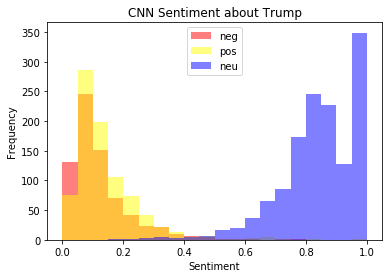

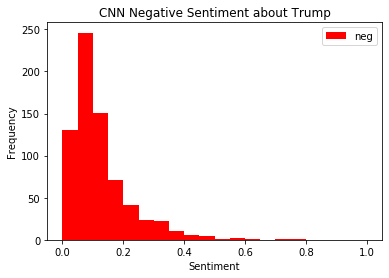

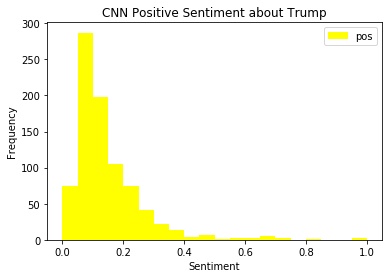

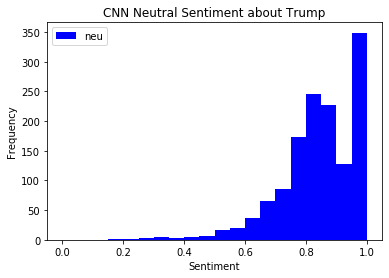

In [7]:
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'CNN')][['neg','pos','neu']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=['red','yellow','blue'], title='CNN Sentiment about Trump').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'CNN')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"], title='CNN Negative Sentiment about Trump').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'CNN')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["yellow"], title='CNN Positive Sentiment about Trump').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'CNN')][['neu']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"], title='CNN Neutral Sentiment about Trump').set_xlabel("Sentiment")


### Breitbart Articles

Text(0.5, 0, 'Sentiment')

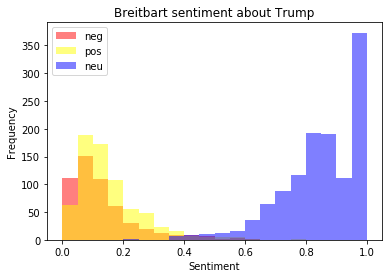

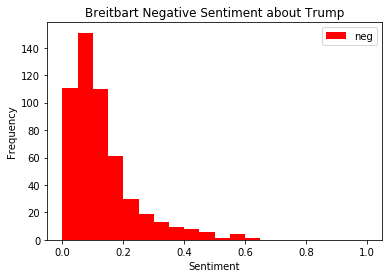

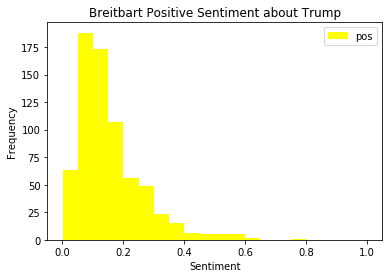

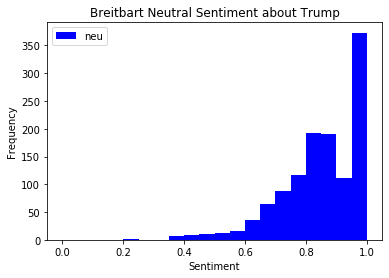

In [8]:
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'Breitbart')][['neg','pos','neu']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=['red','yellow','blue'], title='Breitbart sentiment about Trump').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'Breitbart')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='Breitbart Negative Sentiment about Trump').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'Breitbart')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["yellow"],title='Breitbart Positive Sentiment about Trump').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'Breitbart')][['neu']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='Breitbart Neutral Sentiment about Trump').set_xlabel("Sentiment")

### New York Times Articles

Text(0.5, 0, 'Sentiment')

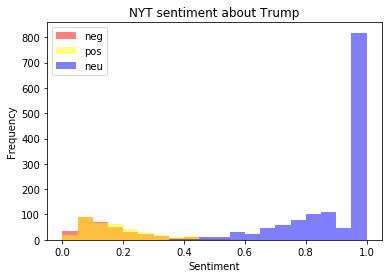

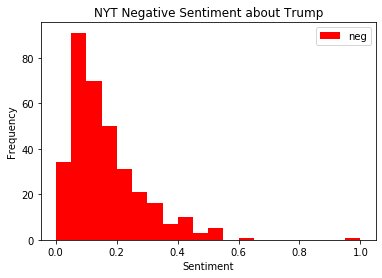

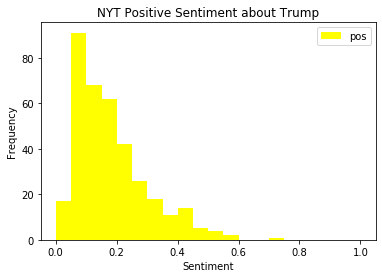

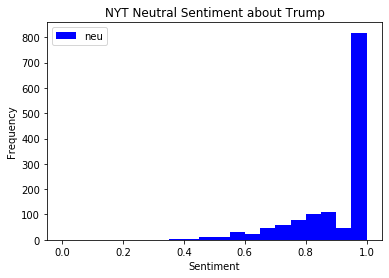

In [9]:
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'NYT')][['neg','pos','neu']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=['red','yellow','blue'], title='NYT sentiment about Trump').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'NYT')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='NYT Negative Sentiment about Trump').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'NYT')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["yellow"],title='NYT Positive Sentiment about Trump').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'NYT')][['neu']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='NYT Neutral Sentiment about Trump').set_xlabel("Sentiment")

## Clinton Sentiment Analysis

### CNN Articles

Text(0.5, 0, 'Sentiment')

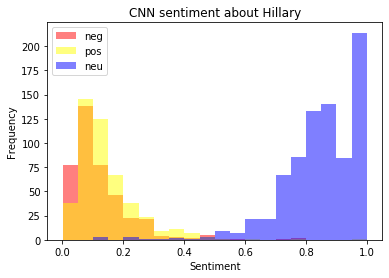

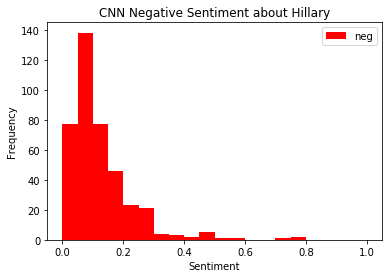

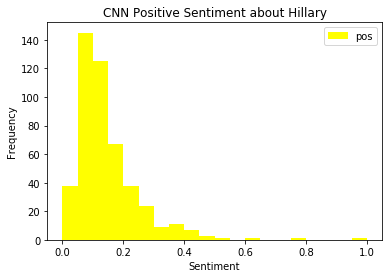

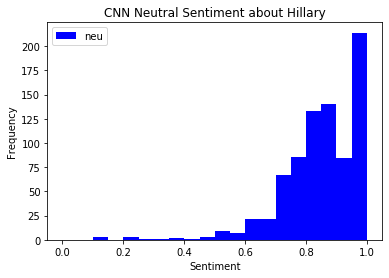

In [10]:
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'CNN')][['neg','pos','neu']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=['red','yellow','blue'],title='CNN sentiment about Hillary').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'CNN')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='CNN Negative Sentiment about Hillary').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'CNN')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["yellow"],title='CNN Positive Sentiment about Hillary').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'CNN')][['neu']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='CNN Neutral Sentiment about Hillary').set_xlabel("Sentiment")

### Breitbart Articles

Text(0.5, 0, 'Sentiment')

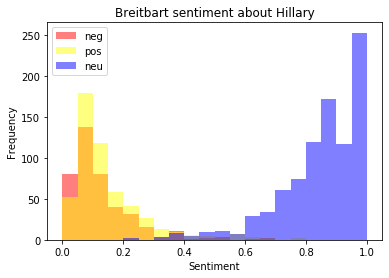

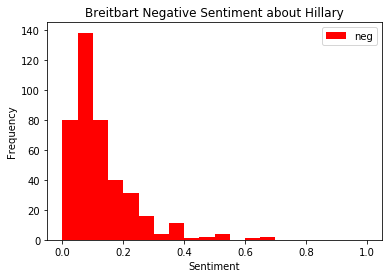

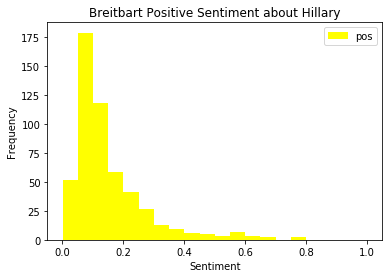

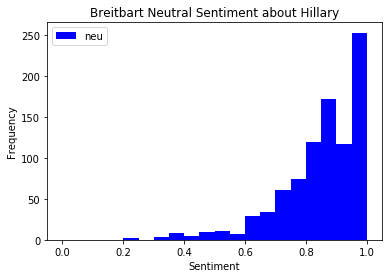

In [11]:
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')][['neg','pos','neu']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=['red','yellow','blue'], title='Breitbart sentiment about Hillary').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='Breitbart Negative Sentiment about Hillary').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["yellow"],title='Breitbart Positive Sentiment about Hillary').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')][['neu']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='Breitbart Neutral Sentiment about Hillary').set_xlabel("Sentiment")

### New York Times Articles

Text(0.5, 0, 'Sentiment')

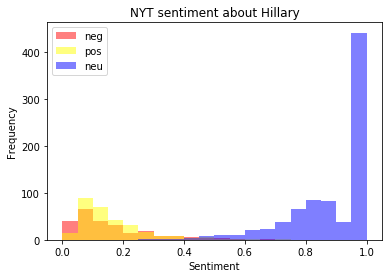

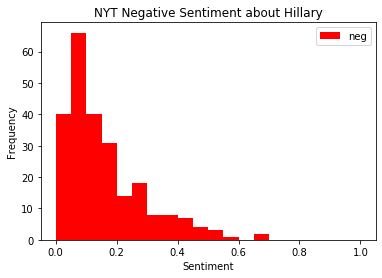

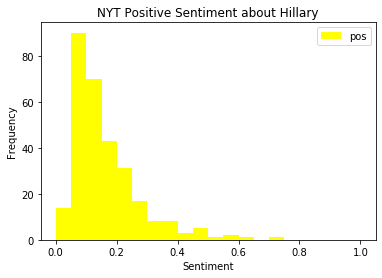

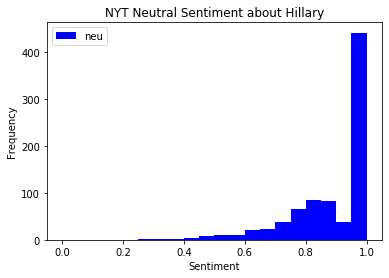

In [12]:
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'NYT')][['neg','pos','neu']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5,color=['red','yellow','blue'],title='NYT sentiment about Hillary').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'NYT')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='NYT Negative Sentiment about Hillary').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'NYT')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["yellow"],title='NYT Positive Sentiment about Hillary').set_xlabel("Sentiment")
df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'NYT')][['neu']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='NYT Neutral Sentiment about Hillary').set_xlabel("Sentiment")

# Less Neutral Article Visualization

So, given this data set, there were high amounts of 0's for neg/pos sentiment because there were a high amount of articles that were neutral
So, lets look at the data again, but this time remove all articles that were neutral. This data set will show us the sentiment for articles that were not completely neutral based on a threshold of 0.8

In [13]:
df_noNeu = df.loc[(df['neu'] < 0.8)]

# Trump Sentiment Analysis

### CNN Articles

Text(0.5, 0, 'Sentiment')

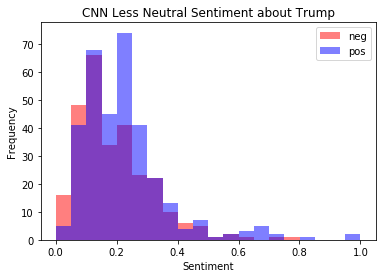

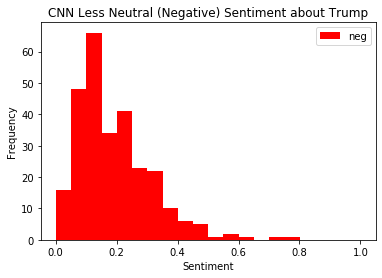

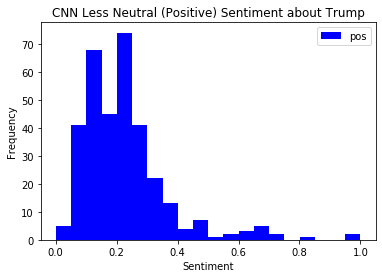

In [14]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'CNN')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=["red","blue"],title='CNN Less Neutral Sentiment about Trump').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'CNN')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='CNN Less Neutral (Negative) Sentiment about Trump').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'CNN')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='CNN Less Neutral (Positive) Sentiment about Trump').set_xlabel("Sentiment")

### Breitbart Articles

Text(0.5, 0, 'Sentiment')

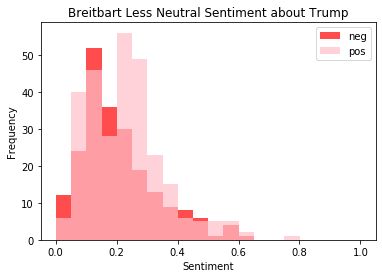

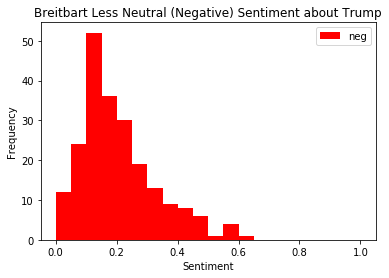

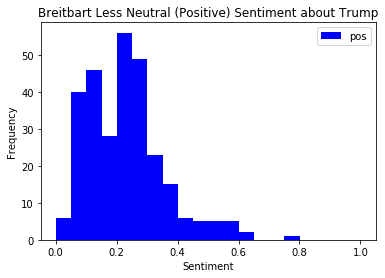

In [15]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'Breitbart')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.7, color=["red","pink"],title='Breitbart Less Neutral Sentiment about Trump').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'Breitbart')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='Breitbart Less Neutral (Negative) Sentiment about Trump').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'Breitbart')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='Breitbart Less Neutral (Positive) Sentiment about Trump').set_xlabel("Sentiment")

### New York Times Articles

Text(0.5, 0, 'Sentiment')

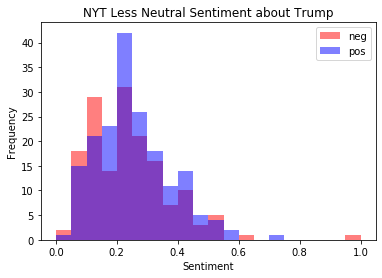

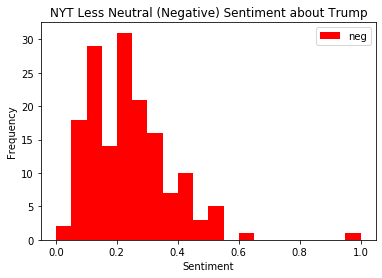

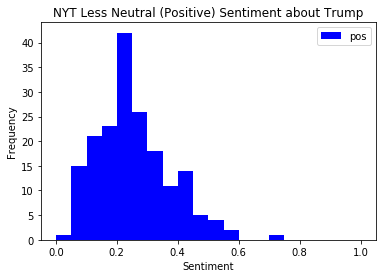

In [16]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'NYT')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=["red","blue"], title='NYT Less Neutral Sentiment about Trump').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'NYT')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='NYT Less Neutral (Negative) Sentiment about Trump').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'NYT')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='NYT Less Neutral (Positive) Sentiment about Trump').set_xlabel("Sentiment")

# Clinton Sentiment Analysis

### CNN Articles

Text(0.5, 0, 'Sentiment')

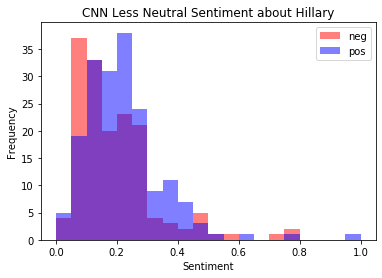

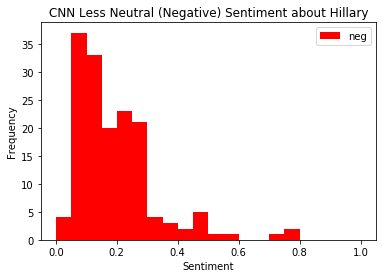

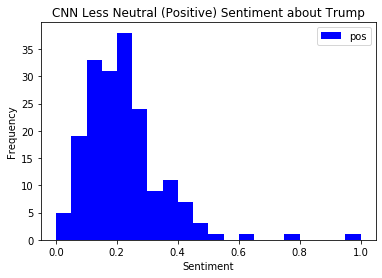

In [17]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'CNN')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=["red","blue"],title='CNN Less Neutral Sentiment about Hillary').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'CNN')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='CNN Less Neutral (Negative) Sentiment about Hillary').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'CNN')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='CNN Less Neutral (Positive) Sentiment about Trump').set_xlabel("Sentiment")

### Breitbart Articles

Text(0.5, 0, 'Sentiment')

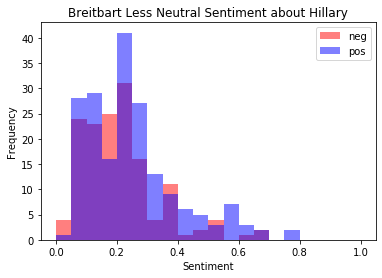

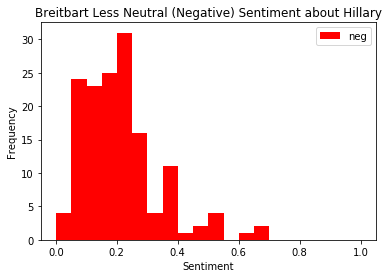

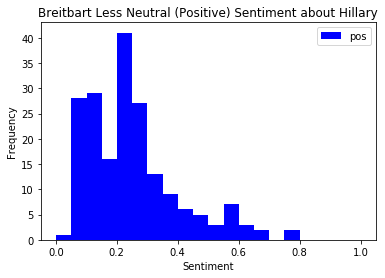

In [18]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'Breitbart')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=["red","blue"],title='Breitbart Less Neutral Sentiment about Hillary').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'Breitbart')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='Breitbart Less Neutral (Negative) Sentiment about Hillary').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'Breitbart')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='Breitbart Less Neutral (Positive) Sentiment about Hillary').set_xlabel("Sentiment")

### New York Times Articles

Text(0.5, 0, 'Sentiment')

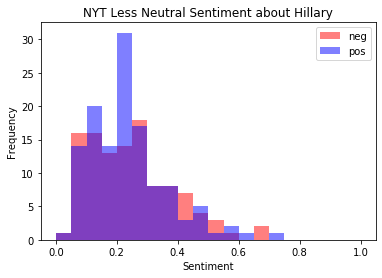

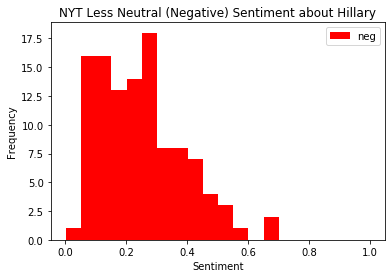

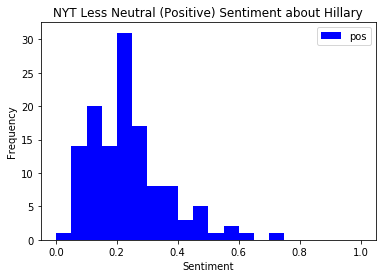

In [19]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'NYT')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=["red","blue"],title='NYT Less Neutral Sentiment about Hillary').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'NYT')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='NYT Less Neutral (Negative) Sentiment about Hillary').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'NYT')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='NYT Less Neutral (Positive) Sentiment about Hillary').set_xlabel("Sentiment")

# Little Neutral Article Visualization

Just for fun, we will do the same thing, but with an even lower neutral threshold of 0.5, just to visualize the data for the sentimentally charged articles

In [20]:
df_noNeu = df.loc[(df['neu'] < 0.5)]

# Trump Sentiment Analysis

### CNN Articles

Text(0.5, 0, 'Sentiment')

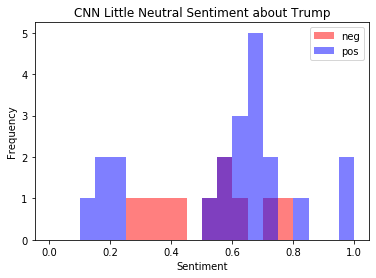

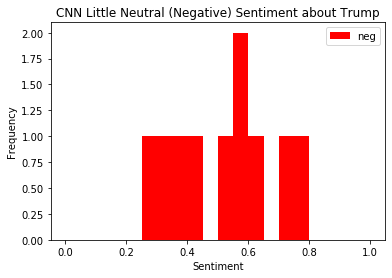

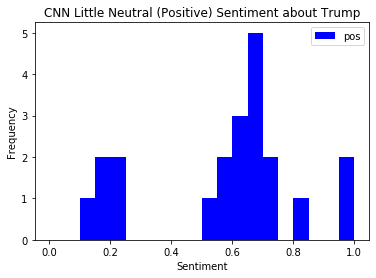

In [21]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'CNN')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=["red","blue"], title='CNN Little Neutral Sentiment about Trump').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'CNN')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='CNN Little Neutral (Negative) Sentiment about Trump').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'CNN')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='CNN Little Neutral (Positive) Sentiment about Trump').set_xlabel("Sentiment")

### Breitbart Articles

Text(0.5, 0, 'Sentiment')

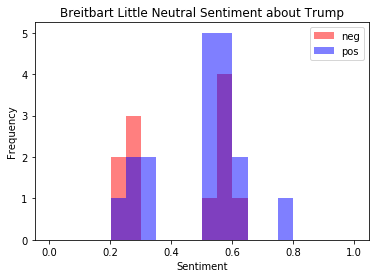

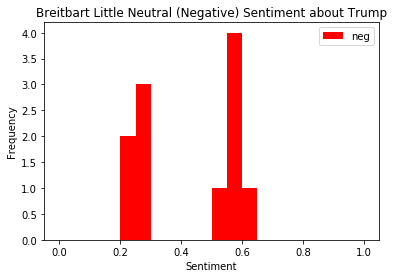

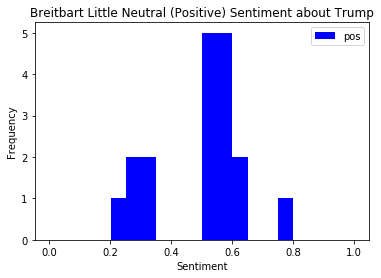

In [22]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'Breitbart')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=["red","blue"],title='Breitbart Little Neutral Sentiment about Trump').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'Breitbart')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='Breitbart Little Neutral (Negative) Sentiment about Trump').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'Breitbart')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='Breitbart Little Neutral (Positive) Sentiment about Trump').set_xlabel("Sentiment")

### New York Times Articles

Text(0.5, 0, 'Sentiment')

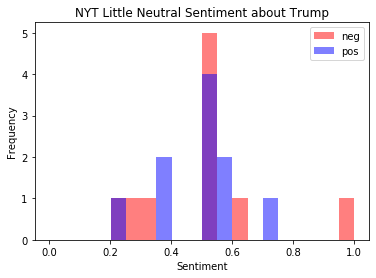

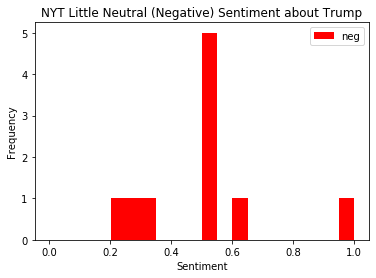

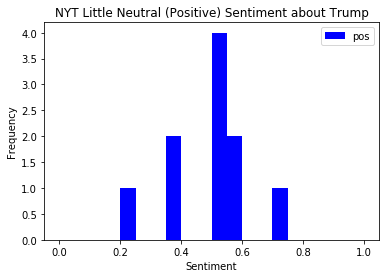

In [23]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'NYT')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=["red","blue"],title='NYT Little Neutral Sentiment about Trump').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'NYT')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='NYT Little Neutral (Negative) Sentiment about Trump').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Trump') & (df_noNeu['News_Source'] == 'NYT')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='NYT Little Neutral (Positive) Sentiment about Trump').set_xlabel("Sentiment")

# Clinton Sentiment Analysis

### CNN Articles

Text(0.5, 0, 'Sentiment')

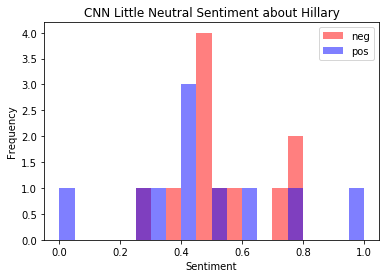

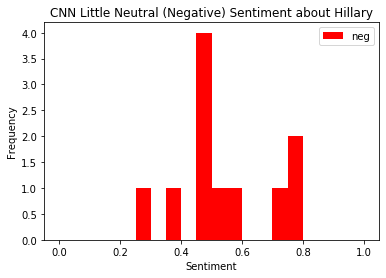

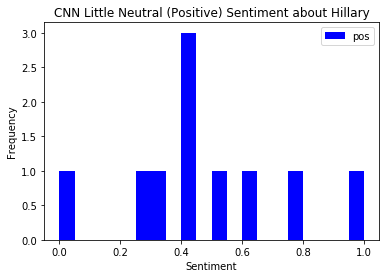

In [24]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'CNN')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=["red","blue"],title='CNN Little Neutral Sentiment about Hillary').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'CNN')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='CNN Little Neutral (Negative) Sentiment about Hillary').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'CNN')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='CNN Little Neutral (Positive) Sentiment about Hillary').set_xlabel("Sentiment")

### Breitbart Articles

Text(0.5, 0, 'Sentiment')

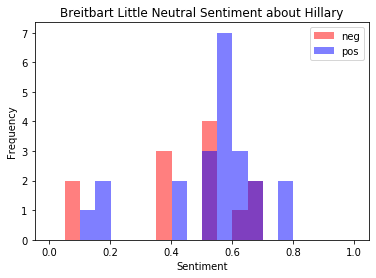

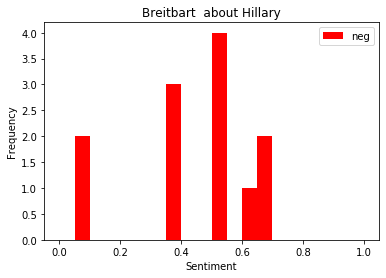

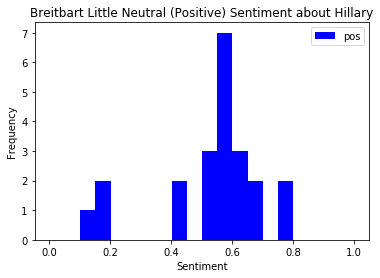

In [25]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'Breitbart')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=["red","blue"],title='Breitbart Little Neutral Sentiment about Hillary').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'Breitbart')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='Breitbart  about Hillary').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'Breitbart')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='Breitbart Little Neutral (Positive) Sentiment about Hillary').set_xlabel("Sentiment")

### New York Times Articles

Text(0.5, 0, 'Sentiment')

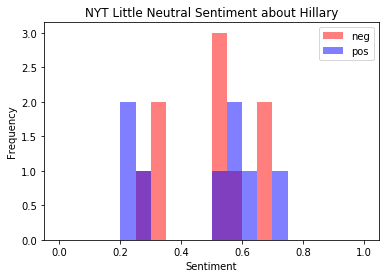

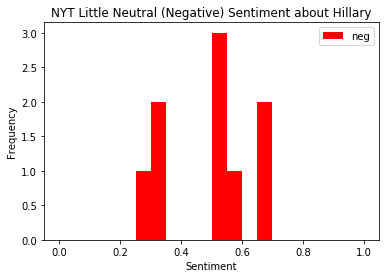

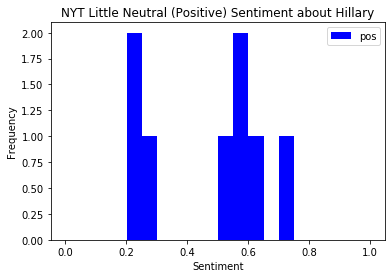

In [26]:
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'NYT')][['neg','pos']].plot.hist(bins=20, range=(0.001,1.0), alpha=0.5, color=["red","blue"],title='NYT Little Neutral Sentiment about Hillary').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'NYT')][['neg']].plot.hist(bins=20, range=(0.001,1.0), color=["red"],title='NYT Little Neutral (Negative) Sentiment about Hillary').set_xlabel("Sentiment")
df_noNeu.loc[(df_noNeu['Candidate'] == 'Hillary') & (df_noNeu['News_Source'] == 'NYT')][['pos']].plot.hist(bins=20, range=(0.001,1.0), color=["blue"],title='NYT Little Neutral (Positive) Sentiment about Hillary').set_xlabel("Sentiment")

# Sentiment of Trump Across all Articles

In [27]:
# Sentiment of Trump Across all Articles
cnn1 = df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'CNN')]["pos"]
cnn2 = df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'CNN')]["neg"]
cnn3 = df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'CNN')]["neu"]
nyt1 = df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'NYT')]["pos"]
nyt2 = df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'NYT')]["neg"]
nyt3 = df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'NYT')]["neu"]
br1 = df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'Breitbart')]["pos"]
br2 = df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'Breitbart')]["neg"]
br3 = df.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'Breitbart')]["neu"]

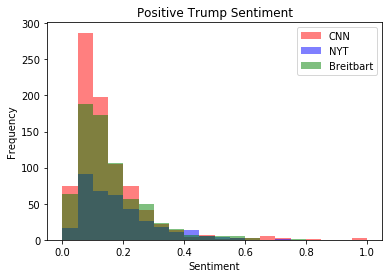

In [28]:
# Trump, pos
plt.hist(cnn1, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN', color ="red")
plt.hist(nyt1, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT', color='blue')
plt.hist(br1, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart', color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Positive Trump Sentiment')
plt.show()


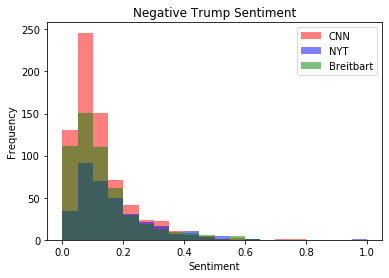

In [29]:
# Trump, neg
plt.hist(cnn2, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN', color='red')
plt.hist(nyt2, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT', color='blue')
plt.hist(br2, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart', color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Negative Trump Sentiment')
plt.show()

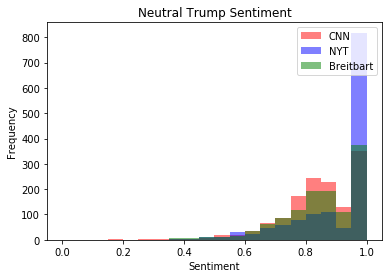

In [30]:
# Trump, neu
plt.hist(cnn3, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN', color='red')
plt.hist(nyt3, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT', color='blue')
plt.hist(br3, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart', color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Neutral Trump Sentiment')
plt.show()

# Sentiment of Hillary Across All Articles

In [31]:
# Sentiment of Hillary Across all Articles
cnn4 = df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'CNN')]["pos"]
cnn5 = df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'CNN')]["neg"]
cnn6 = df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'CNN')]["neu"]
nyt4 = df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'NYT')]["pos"]
nyt5 = df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'NYT')]["neg"]
nyt6 = df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'NYT')]["neu"]
br4 = df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')]["pos"]
br5 = df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')]["neg"]
br6 = df.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')]["neu"]

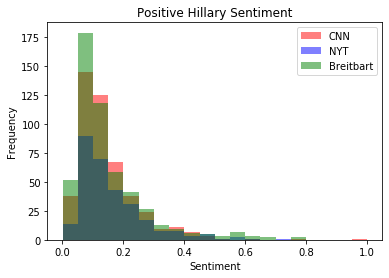

In [32]:
# Hillary, pos
plt.hist(cnn4, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN', color='red')
plt.hist(nyt4, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT', color='blue')
plt.hist(br4, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart', color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Positive Hillary Sentiment')
plt.show()

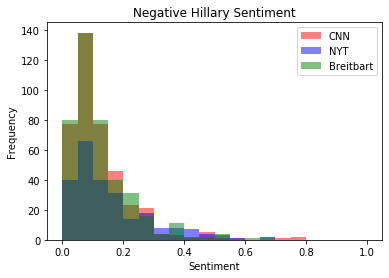

In [33]:
# Hillary, neg
plt.hist(cnn5, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN', color='red')
plt.hist(nyt5, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT', color='blue')
plt.hist(br5, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart', color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Negative Hillary Sentiment')
plt.show()

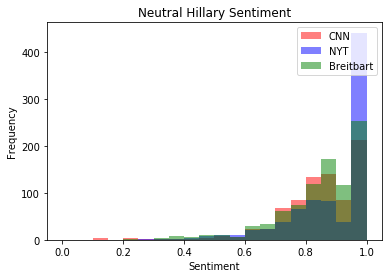

In [34]:
# Hillary, neu
plt.hist(cnn6, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN', color='red')
plt.hist(nyt6, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT', color='blue')
plt.hist(br6, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart', color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Neutral Hillary Sentiment')
plt.show()

# Less Neutral Sentiment of Trump Across All Articles

In [35]:
# Less Neutral Sentiment of Trump Across all Articles
cnn7 = df_noNeu.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'CNN')]["pos"]
cnn8 = df_noNeu.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'CNN')]["neg"]
nyt7 = df_noNeu.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'NYT')]["pos"]
nyt8 = df_noNeu.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'NYT')]["neg"]
br7 = df_noNeu.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'Breitbart')]["pos"]
br8 = df_noNeu.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'Breitbart')]["neg"]

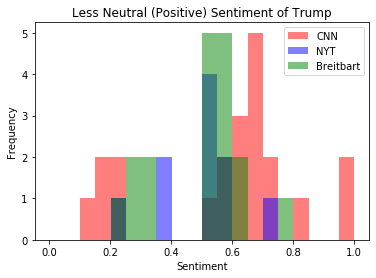

In [36]:
# Trump, pos
plt.hist(cnn7, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN', color='red')
plt.hist(nyt7, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT', color='blue')
plt.hist(br7, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart', color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Less Neutral (Positive) Sentiment of Trump')
plt.show()

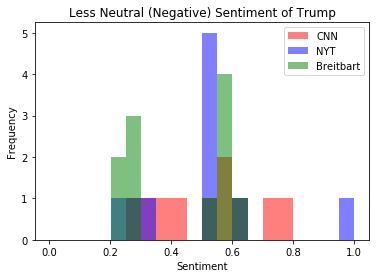

In [37]:
# Trump, neg
plt.hist(cnn8, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN', color='red')
plt.hist(nyt8, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT', color='blue')
plt.hist(br8, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart', color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Less Neutral (Negative) Sentiment of Trump')
plt.show()

# Less Neutral Sentiment of Hillary Across All Articles

In [38]:
# Less Neutral Sentiment of Hillary Across all Articles
cnn9 = df_noNeu.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'CNN')]["pos"]
cnn10 = df_noNeu.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'CNN')]["neg"]
nyt9 = df_noNeu.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'NYT')]["pos"]
nyt10 = df_noNeu.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'NYT')]["neg"]
br9 = df_noNeu.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')]["pos"]
br10 = df_noNeu.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')]["neg"]

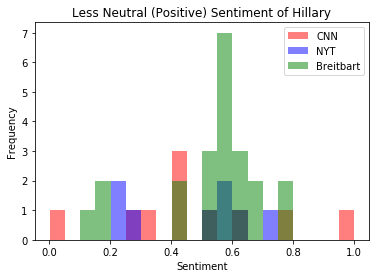

In [39]:
# Hillary, pos
plt.hist(cnn9, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN', color='red')
plt.hist(nyt9, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT', color='blue')
plt.hist(br9, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart', color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Less Neutral (Positive) Sentiment of Hillary')
plt.show()

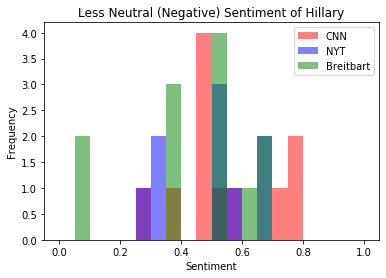

In [40]:
# Hillary, neg
plt.hist(cnn10, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN', color='red')
plt.hist(nyt10, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT', color='blue')
plt.hist(br10, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart', color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Less Neutral (Negative) Sentiment of Hillary')
plt.show()

# Little Neutral Sentiment of Trump Across all Articles

In [41]:
# Little Neutral Sentiment of Trump Across all Articles
cnn11 = df_noNeu.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'CNN')]["pos"]
cnn12 = df_noNeu.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'CNN')]["neg"]
nyt11 = df_noNeu.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'NYT')]["pos"]
nyt12 = df_noNeu.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'NYT')]["neg"]
br11 = df_noNeu.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'Breitbart')]["pos"]
br12 = df_noNeu.loc[(df['Candidate'] == 'Trump') & (df['News_Source'] == 'Breitbart')]["neg"]

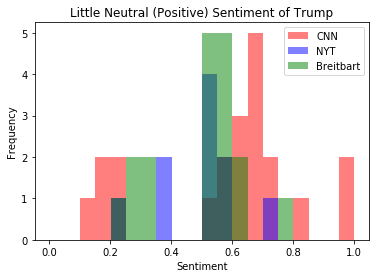

In [42]:
# Trump, pos
plt.hist(cnn11, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN', color='red')
plt.hist(nyt11, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT', color='blue')
plt.hist(br11, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart', color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Little Neutral (Positive) Sentiment of Trump')
plt.show()

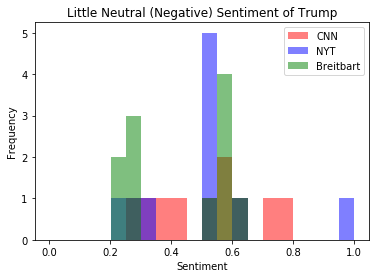

In [43]:
# Trump, neg
plt.hist(cnn12, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN', color='red')
plt.hist(nyt12, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT', color='blue')
plt.hist(br12, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart', color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Little Neutral (Negative) Sentiment of Trump')
plt.show()

# Little Neutral Sentiment of Hillary Across All Articles

In [44]:
# Little Neutral Sentiment of Hillary Across all Articles
cnn13 = df_noNeu.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'CNN')]["pos"]
cnn14 = df_noNeu.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'CNN')]["neg"]
nyt13 = df_noNeu.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'NYT')]["pos"]
nyt14 = df_noNeu.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'NYT')]["neg"]
br13 = df_noNeu.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')]["pos"]
br14 = df_noNeu.loc[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')]["neg"]

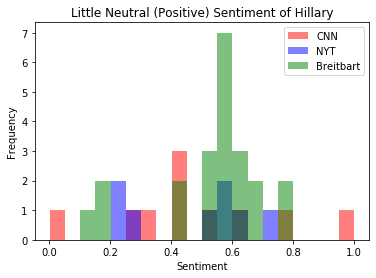

In [45]:
# Hillary, pos
plt.hist(cnn13, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN',color='red')
plt.hist(nyt13, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT',color='blue')
plt.hist(br13, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart',color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Little Neutral (Positive) Sentiment of Hillary')
plt.show()

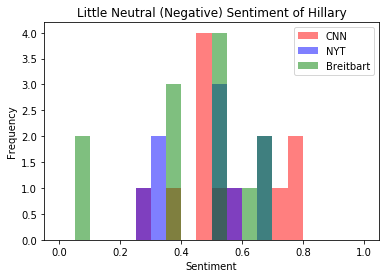

In [46]:
# Hillary, neg
plt.hist(cnn14, bins=20, range=(0.001,1.0), alpha=0.5, label='CNN',color='red')
plt.hist(nyt14, bins=20, range=(0.001,1.0), alpha=0.5, label='NYT',color='blue')
plt.hist(br14, bins=20, range=(0.001,1.0), alpha=0.5, label='Breitbart', color='green')
plt.legend(loc='upper right')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Little Neutral (Negative) Sentiment of Hillary')
plt.show()

# Average Sentiment of Trump

In [47]:
#df of CNN articles on Trump
cnnTrumpIncludingNeu = df.loc[(df['News_Source'] == 'CNN') & (df['Candidate'] == "Trump")]

#get the average sentiment on Trump
cnnTrumpIncludingNeuAvgOfNeu = cnnTrumpIncludingNeu['neu'].mean()
cnnTrumpIncludingNeuAvgOfNeg = cnnTrumpIncludingNeu['neg'].mean()
cnnTrumpIncludingNeuAvgOfPos = cnnTrumpIncludingNeu['pos'].mean()

In [48]:
#df of Breitbart articles on Trump
BreitbartTrumpIncludingNeu = df.loc[(df['News_Source'] == 'Breitbart') & (df['Candidate'] == "Trump")]

#get the average neutral sentiment on Trump
BreitbartTrumpIncludingNeuAvgOfNeu = BreitbartTrumpIncludingNeu['neu'].mean()
BreitbartTrumpIncludingNeuAvgOfNeg = BreitbartTrumpIncludingNeu['neg'].mean()
BreitbartTrumpIncludingNeuAvgOfPos = BreitbartTrumpIncludingNeu['pos'].mean()

In [49]:
#df of NYT articles on Trump
NYTTrumpIncludingNeu = df.loc[(df['News_Source'] == 'NYT') & (df['Candidate'] == "Trump")]

#get the average neutral sentiment on Trump
NYTTrumpIncludingNeuAvgOfNeu = NYTTrumpIncludingNeu['neu'].mean()
NYTTrumpIncludingNeuAvgOfNeg = NYTTrumpIncludingNeu['neg'].mean()
NYTTrumpIncludingNeuAvgOfPos = NYTTrumpIncludingNeu['pos'].mean()

In [50]:
#data frame averages when including neutral
d = {'News_Source': ['CNN', 'Breitbart', 'NYT'], 'Candidate': ['Trump', 'Trump', 'Trump'], 
     'neg' : [cnnTrumpIncludingNeuAvgOfNeg,BreitbartTrumpIncludingNeuAvgOfNeg, NYTTrumpIncludingNeuAvgOfNeg],
     'neu' : [cnnTrumpIncludingNeuAvgOfNeu,BreitbartTrumpIncludingNeuAvgOfNeu, NYTTrumpIncludingNeuAvgOfNeu],
     'pos' : [cnnTrumpIncludingNeuAvgOfPos,BreitbartTrumpIncludingNeuAvgOfPos, NYTTrumpIncludingNeuAvgOfPos]}
AverageSetimentsIncludingNeu = pd.DataFrame(data=d)
AverageSetimentsIncludingNeu

,News_Source,Candidate,neg,neu,pos
0,CNN,Trump,0.064676,0.845197,0.090127
1,Breitbart,Trump,0.055926,0.855388,0.088687
2,NYT,Trump,0.041422,0.909511,0.049070


# Average Sentiment of Hillary

In [51]:
#df of CNN articles on Hillary
cnnHillaryIncludingNeu = df.loc[(df['News_Source'] == 'CNN') & (df['Candidate'] == "Hillary")]

#get the average sentiment on Hillary
cnnHillaryIncludingNeuAvgOfNeu = cnnHillaryIncludingNeu['neu'].mean()
cnnHillaryIncludingNeuAvgOfNeg = cnnHillaryIncludingNeu['neg'].mean()
cnnHillaryIncludingNeuAvgOfPos = cnnHillaryIncludingNeu['pos'].mean()

In [52]:
#df of Breitbart on Hillary
BreitbartHillaryIncludingNeu = df.loc[(df['News_Source'] == 'Breitbart') & (df['Candidate'] == "Hillary")]

#get the average sentiment on Hillary
BreitbartHillaryIncludingNeuAvgOfNeu = BreitbartHillaryIncludingNeu['neu'].mean()
BreitbartHillaryIncludingNeuAvgOfNeg = BreitbartHillaryIncludingNeu['neg'].mean()
BreitbartHillaryIncludingNeuAvgOfPos = BreitbartHillaryIncludingNeu['pos'].mean()

In [53]:
#df of NYT on Hillary
NYTHillaryIncludingNeu = df.loc[(df['News_Source'] == 'NYT') & (df['Candidate'] == "Hillary")]

#get the average sentiment on Hillary
NYTHillaryIncludingNeuAvgOfNeu = NYTHillaryIncludingNeu['neu'].mean()
NYTHillaryIncludingNeuAvgOfNeg = NYTHillaryIncludingNeu['neg'].mean()
NYTHillaryIncludingNeuAvgOfPos = NYTHillaryIncludingNeu['pos'].mean()

In [54]:
#data frame averages when including neutral
d = {'News_Source': ['CNN', 'Breitbart', 'NYT'], 'Candidate': ['Hillary', 'Hillary', 'Hillary'], 
     'neg' : [cnnHillaryIncludingNeuAvgOfNeg,BreitbartHillaryIncludingNeuAvgOfNeg, NYTHillaryIncludingNeuAvgOfNeg],
     'neu' : [cnnHillaryIncludingNeuAvgOfNeu,BreitbartHillaryIncludingNeuAvgOfNeu, NYTHillaryIncludingNeuAvgOfNeu],
     'pos' : [cnnHillaryIncludingNeuAvgOfPos,BreitbartHillaryIncludingNeuAvgOfPos, NYTHillaryIncludingNeuAvgOfPos]}
AverageSetimentsIncludingNeu = pd.DataFrame(data=d)
AverageSetimentsIncludingNeu

,News_Source,Candidate,neg,neu,pos
0,CNN,Hillary,0.062295,0.851637,0.086053
1,Breitbart,Hillary,0.057542,0.855050,0.087426
2,NYT,Hillary,0.046903,0.895638,0.057469


# Average Sentiment of Trump (Less Neutral Article Visualization)

In [55]:
df_noNeu = df.loc[(df['neu'] < 0.8)]

In [56]:
#df of CNN on Trump
cnnTrumpNonNeu = df_noNeu.loc[(df['News_Source'] == 'CNN') & (df['Candidate'] == "Trump")]

#get the average sentiment on Trump
cnnTrumpLessNeuAvgOfNeu = cnnTrumpNonNeu['neu'].mean()
cnnTrumpLessNeuAvgOfNeg = cnnTrumpNonNeu['neg'].mean()
cnnTrumpLessNeuAvgOfPos = cnnTrumpNonNeu['pos'].mean()

In [57]:
#df of Breitbart on Trump
BreitbartTrumpNonNeu = df_noNeu.loc[(df['News_Source'] == 'Breitbart') & (df['Candidate'] == "Trump")]

#get the average sentiment on Trump
BreitbartTrumpLessNeuAvgOfNeu = BreitbartTrumpNonNeu['neu'].mean()
BreitbartTrumpLessNeuAvgOfNeg = BreitbartTrumpNonNeu['neg'].mean()
BreitbartTrumpLessNeuAvgOfPos = BreitbartTrumpNonNeu['pos'].mean()

In [58]:
#df of NYT on Trump
NYTTrumpNonNeu = df_noNeu.loc[(df['News_Source'] == 'NYT') & (df['Candidate'] == "Trump")]

#get the average sentiment on Trump
NYTTrumpLessNeuAvgOfNeu = NYTTrumpNonNeu['neu'].mean()
NYTTrumpLessNeuAvgOfNeg = NYTTrumpNonNeu['neg'].mean()
NYTTrumpLessNeuAvgOfPos = NYTTrumpNonNeu['pos'].mean()

In [59]:
#data frame averages when including neutral
dn = {'News_Source': ['CNN', 'Breitbart', 'NYT'], 'Candidate': ['Trump', 'Trump', 'Trump'], 
     'neg' : [cnnTrumpLessNeuAvgOfNeg,BreitbartTrumpLessNeuAvgOfNeg, NYTTrumpLessNeuAvgOfNeg],
     'neu' : [cnnTrumpLessNeuAvgOfNeu,BreitbartTrumpLessNeuAvgOfNeu, NYTTrumpLessNeuAvgOfNeu],
     'pos' : [cnnTrumpLessNeuAvgOfPos,BreitbartTrumpLessNeuAvgOfPos, NYTTrumpLessNeuAvgOfPos]}
AverageSetimentsNonNeu = pd.DataFrame(data=dn)
AverageSetimentsNonNeu

,News_Source,Candidate,neg,neu,pos
0,CNN,Trump,0.127756,0.690335,0.181907
1,Breitbart,Trump,0.124175,0.689417,0.186406
2,NYT,Trump,0.145437,0.675318,0.179230


# Average Sentiment of Hillary (Less Neutral Article Visualization)

In [60]:
#df of CNN on Hillary
cnnHillaryNonNeu = df_noNeu.loc[(df['News_Source'] == 'CNN') & (df['Candidate'] == "Hillary")]

#get the average sentiment on Hillary
cnnHillaryLessNeuAvgOfNeu = cnnHillaryNonNeu['neu'].mean()
cnnHillaryLessNeuAvgOfNeg = cnnHillaryNonNeu['neg'].mean()
cnnHillaryLessNeuAvgOfPos = cnnHillaryNonNeu['pos'].mean()

In [61]:
#df of Breitbart on Hillary
BreitbartHillaryNonNeu = df_noNeu.loc[(df['News_Source'] == 'Breitbart') & (df['Candidate'] == "Hillary")]

#get the average sentiment on Hillary
BreitbartHillaryLessNeuAvgOfNeu = BreitbartHillaryNonNeu['neu'].mean()
BreitbartHillaryLessNeuAvgOfNeg = BreitbartHillaryNonNeu['neg'].mean()
BreitbartHillaryLessNeuAvgOfPos = BreitbartHillaryNonNeu['pos'].mean()

In [62]:
#df of NYT on Hillary
NYTHillaryNonNeu = df_noNeu.loc[(df['News_Source'] == 'NYT') & (df['Candidate'] == "Hillary")]

#get the average sentiment on Trump
NYTHillaryLessNeuAvgOfNeu = NYTHillaryNonNeu['neu'].mean()
NYTHillaryLessNeuAvgOfNeg = NYTHillaryNonNeu['neg'].mean()
NYTHillaryLessNeuAvgOfPos = NYTHillaryNonNeu['pos'].mean()

In [63]:
#data frame averages when including neutral
dn = {'News_Source': ['CNN', 'Breitbart', 'NYT'], 'Candidate': ['Hillary', 'Hillary', 'Hillary'], 
     'neg' : [cnnHillaryLessNeuAvgOfNeg,BreitbartHillaryLessNeuAvgOfNeg, NYTHillaryLessNeuAvgOfNeg],
     'neu' : [cnnHillaryLessNeuAvgOfNeu,BreitbartHillaryLessNeuAvgOfNeu, NYTHillaryLessNeuAvgOfNeu],
     'pos' : [cnnHillaryLessNeuAvgOfPos,BreitbartHillaryLessNeuAvgOfPos, NYTHillaryLessNeuAvgOfPos]}
AverageSetimentsNonNeu = pd.DataFrame(data=dn)
AverageSetimentsNonNeu

,News_Source,Candidate,neg,neu,pos
0,CNN,Hillary,0.132300,0.689749,0.177956
1,Breitbart,Hillary,0.128235,0.674103,0.197671
2,NYT,Hillary,0.153559,0.677737,0.168715


# Average Sentiment of Trump (Little Neutral Article Visualization)

In [64]:
df_noNeu = df.loc[(df['neu'] < 0.5)]

In [65]:
#df of CNN on Trump
cnnTrumplitNeu = df_noNeu.loc[(df['News_Source'] == 'CNN') & (df['Candidate'] == "Trump")]

#get the average sentiment on Trump
cnnTrumplitNeuAvgOfNeu = cnnTrumplitNeu['neu'].mean()
cnnTrumplitNeuAvgOfNeg = cnnTrumplitNeu['neg'].mean()
cnnTrumplitNeuAvgOfPos = cnnTrumplitNeu['pos'].mean()

In [66]:
#df of Breitbart on Trump
BreitbartTrumplitNeu = df_noNeu.loc[(df['News_Source'] == 'Breitbart') & (df['Candidate'] == "Trump")]

#get the average sentiment on Trump
BreitbartTrumplitNeuAvgOfNeu = BreitbartTrumplitNeu['neu'].mean()
BreitbartTrumplitNeuAvgOfNeg = BreitbartTrumplitNeu['neg'].mean()
BreitbartTrumplitNeuAvgOfPos = BreitbartTrumplitNeu['pos'].mean()

In [67]:
#df of NYT on Trump
NYTTrumplitNeu = df_noNeu.loc[(df['News_Source'] == 'NYT') & (df['Candidate'] == "Trump")]

#get the average sentiment on Trump
NYTTrumplitNeuAvgOfNeu = NYTTrumplitNeu['neu'].mean()
NYTTrumplitNeuAvgOfNeg = NYTTrumplitNeu['neg'].mean()
NYTTrumplitNeuAvgOfPos = NYTTrumplitNeu['pos'].mean()

In [68]:
#data frame averages when including neutral
dn = {'News_Source': ['CNN', 'Breitbart', 'NYT'], 'Candidiate': ['Trump', 'Trump', 'Trump'], 
     'neg' : [cnnTrumplitNeuAvgOfNeg,BreitbartTrumpLessNeuAvgOfNeg, NYTTrumpLessNeuAvgOfNeg],
     'neu' : [cnnTrumplitNeuAvgOfNeu,BreitbartTrumpLessNeuAvgOfNeu, NYTTrumpLessNeuAvgOfNeu],
     'pos' : [cnnTrumplitNeuAvgOfPos,BreitbartTrumpLessNeuAvgOfPos, NYTTrumpLessNeuAvgOfPos]}
AverageSetimentsNonNeu = pd.DataFrame(data=dn)
AverageSetimentsNonNeu

,News_Source,Candidiate,neg,neu,pos
0,CNN,Trump,0.198654,0.333423,0.468000
1,Breitbart,Trump,0.124175,0.689417,0.186406
2,NYT,Trump,0.145437,0.675318,0.179230


# Average Sentiment of Hillary (Little Neutral Article Visualization)

In [69]:
#df of CNN on Hillary
cnnHillarylitNeu = df_noNeu.loc[(df['News_Source'] == 'CNN') & (df['Candidate'] == "Hillary")]

#get the average sentiment on Trump
cnnHillarylitNeuAvgOfNeu = cnnHillarylitNeu['neu'].mean()
cnnHillarylitNeuAvgOfNeg = cnnHillarylitNeu['neg'].mean()
cnnHillarylitNeuAvgOfPos = cnnHillarylitNeu['pos'].mean()

In [70]:
#df of Breitbart on Hillary
BreitbartHillarylitNeu = df_noNeu.loc[(df['News_Source'] == 'CNN') & (df['Candidate'] == "Hillary")]

#get the average sentiment on Trump
BreitbartHillarylitNeuAvgOfNeu = BreitbartHillarylitNeu['neu'].mean()
BreitbartHillarylitNeuAvgOfNeg = BreitbartHillarylitNeu['neg'].mean()
BreitbartHillarylitNeuAvgOfPos = BreitbartHillarylitNeu['pos'].mean()

In [71]:
#df of NYT on Hillary
NYTHillarylitNeu = df_noNeu.loc[(df['News_Source'] == 'NYT') & (df['Candidate'] == "Hillary")]

#get the average sentiment on Trump
NYTHillarylitNeuAvgOfNeu = NYTHillarylitNeu['neu'].mean()
NYTHillarylitNeuAvgOfNeg = NYTHillarylitNeu['neg'].mean()
NYTHillarylitNeuAvgOfPos = NYTHillarylitNeu['pos'].mean()

In [72]:
#data frame averages when including neutral
dn = {'News_Source': ['CNN', 'Breitbart', 'NYT'], 'Candidate': ['Hillary', 'Hillary', 'Hillary'], 
     'neg' : [cnnHillarylitNeuAvgOfNeg,BreitbartHillaryLessNeuAvgOfNeg, NYTHillaryLessNeuAvgOfNeg],
     'neu' : [cnnHillarylitNeuAvgOfNeu,BreitbartHillaryLessNeuAvgOfNeu, NYTHillaryLessNeuAvgOfNeu],
     'pos' : [cnnHillarylitNeuAvgOfPos,BreitbartHillaryLessNeuAvgOfPos, NYTHillaryLessNeuAvgOfPos]}
AverageSetimentsNonNeu = pd.DataFrame(data=dn)
AverageSetimentsNonNeu

,News_Source,Candidate,neg,neu,pos
0,CNN,Hillary,0.392533,0.286800,0.320600
1,Breitbart,Hillary,0.128235,0.674103,0.197671
2,NYT,Hillary,0.153559,0.677737,0.168715


# Normal Distribution

In [73]:
def reject_null(p_value):
    if p_value < 0.01:
        return True
    else:
        return False

In [74]:
# get all the values by sentiment by candidate
hillary_pos = df[(df['Candidate'] == 'Hillary') & (df['News_Source'] == 'Breitbart')]['pos'].values
hillary_neg = df[df['Candidate'] == 'Hillary']['neg'].values
hillary_neu = df[df['Candidate'] == 'Hillary']['neu'].values
trump_pos = df[df['Candidate'] == 'Trump']['pos'].values
trump_neg = df[df['Candidate'] == 'Trump']['neg'].values
trump_neu = df[df['Candidate'] == 'Trump']['neu'].values

In [75]:
# get the test stat and p-value
stat_hillary_pos, p_hillary_pos = normaltest(hillary_pos)
stat_hillary_neg, p_hillary_neg = normaltest(hillary_neg)
stat_hillary_neu, p_hillary_neu = normaltest(hillary_neu)

stat_trump_pos, p_trump_pos = normaltest(trump_pos)
stat_trump_neg, p_trump_neg = normaltest(trump_neg)
stat_trump_neu, p_trump_neu = normaltest(trump_neu)

In [76]:
# see if the p-values reject the null
bool_hillary_pos = reject_null(p_hillary_pos)
bool_hillary_neg = reject_null(p_hillary_neg)
bool_hillary_neu = reject_null(p_hillary_neu)

bool_trump_pos = reject_null(p_trump_pos)
bool_trump_neg = reject_null(p_trump_neg)
bool_trump_neu = reject_null(p_trump_neu)

print(bool_hillary_pos)
print(bool_hillary_neg)
print(bool_hillary_neu)
print(bool_trump_pos)
print(bool_trump_neg)
print(bool_trump_neu)

True
True
True
True
True
True


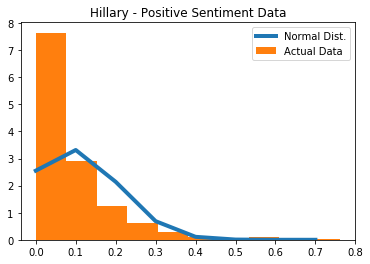

In [77]:
xs = np.arange(hillary_pos.min(), hillary_pos.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(hillary_pos), np.std(hillary_pos))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(hillary_pos, density = True, label = 'Actual Data');
plt.title('Hillary - Positive Sentiment Data')
plt.legend();

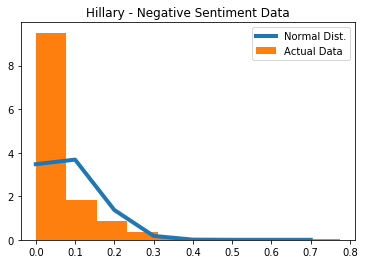

In [78]:
xs = np.arange(hillary_neg.min(), hillary_neg.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(hillary_neg), np.std(hillary_neg))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(hillary_neg, density = True, label = 'Actual Data');
plt.title('Hillary - Negative Sentiment Data')
plt.legend();

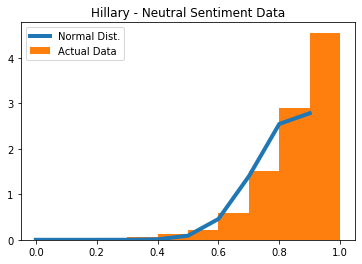

In [79]:
xs = np.arange(hillary_neu.min(), hillary_neu.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(hillary_neu), np.std(hillary_neu))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(hillary_neu, density = True, label = 'Actual Data');
plt.title('Hillary - Neutral Sentiment Data')
plt.legend();

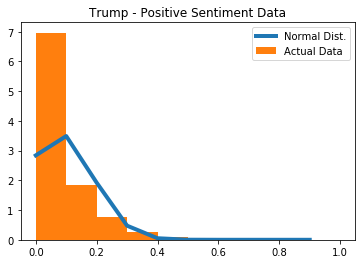

In [80]:
xs = np.arange(trump_pos.min(), trump_pos.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(trump_pos), np.std(trump_pos))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(trump_pos, density = True, label = 'Actual Data');
plt.title('Trump - Positive Sentiment Data')
plt.legend();

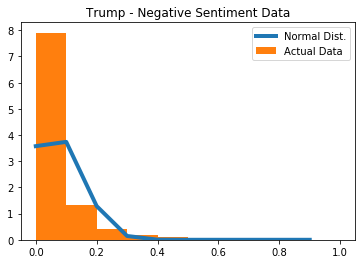

In [81]:
xs = np.arange(trump_neg.min(), trump_neg.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(trump_neg), np.std(trump_neg))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(trump_neg, density = True, label = 'Actual Data');
plt.title('Trump - Negative Sentiment Data')
plt.legend();

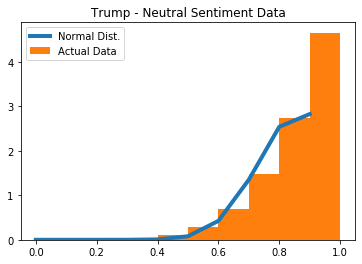

In [82]:
xs = np.arange(trump_neu.min(), trump_neu.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(trump_neu), np.std(trump_neu))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(trump_neu, density = True, label = 'Actual Data');
plt.title('Trump - Neutral Sentiment Data')
plt.legend();

# T-Test

In [83]:
# get test stat and p-value
t_pos, p_pos = ttest_ind(hillary_pos, trump_pos)
t_neg, p_neg = ttest_ind(hillary_neg, trump_neg)
t_neu, p_neu = ttest_ind(hillary_neu, trump_neu)

In [84]:
# check if p-values are significant
bool_pos = reject_null(p_pos)
bool_neg = reject_null(p_neg)
bool_neu = reject_null(p_neu)

print(bool_pos)
print(bool_neg)
print(bool_neu)

True
False
False


# Ethics & Privacy

There should not be any privacy concerns with the data used as it will be taken from news articles and coverage that is already available to the public. There may be potential biases in the dataset if it doesn't use diverse sources or overly relies on select sources. This is because of the potential political biases of news outlets. We control for this by having variables for the specific news organization. Thus, we will have multiple perspectives on the coverage instead of a combined media perspective. There may also be an unintended use of the data to promote narratives of why the coverage is directed the way it is. Our research is specifically meant to look for correlations of positive/negative coverage of candidates and does not prove any bias towards/against candidates.
 
One thing we have to worry about in terms of ethics is that news outlets may have certain ideas they would want to promote. For example, a news source might have policies on what their hosts can talk about and how they should present the information to the public. If we do not account for this fact, it can raise ethical issues because it can skew our data with the biases of particular news outlet.

# Conclusion & Discussion

# Team Contributions

- Manit and Aaron wrote the main web scrapping algorithms
- Young Jun, Esau, and Cooper analyzed the data, created questions, and made adjustments to the dataframe